# Import Libarary

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
import xgboost as xgb

# Load Dataset

In [2]:
job_posting = pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/job_postings.csv")

In [3]:
companies = pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/company_details/companies.csv")

In [4]:
company_industries = pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/company_details/company_industries.csv")

In [5]:
company_specialities = pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/company_details/company_specialities.csv")

In [6]:
employee_counts = pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/company_details/employee_counts.csv")

In [7]:
benefits= pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/job_details/benefits.csv")

In [8]:
job_industries= pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/job_details/job_industries.csv")

In [9]:
salaries= pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/job_details/salaries.csv")

In [10]:
skills_map = pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/maps/skills.csv")

In [11]:
industries = pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/maps/industries.csv")

In [12]:
job_skills= pd.read_csv("/content/drive/MyDrive/데이터과학 팀프로젝트/job_details/job_skills.csv")

# Data Info

In [13]:
# pd.options.display.float_format = '{:.5f}'.format
# If you don't want to see it with e included, run this code

In [14]:
job_posting

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,NaN,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1


In [15]:
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

In [16]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11361 entries, 0 to 11360
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    11361 non-null  int64  
 1   name          11360 non-null  object 
 2   description   11218 non-null  object 
 3   company_size  10256 non-null  float64
 4   state         11353 non-null  object 
 5   country       11361 non-null  object 
 6   city          11360 non-null  object 
 7   zip_code      11349 non-null  object 
 8   address       11350 non-null  object 
 9   url           11361 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 887.7+ KB


In [17]:
company_industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12601 entries, 0 to 12600
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  12601 non-null  int64 
 1   industry    12601 non-null  object
dtypes: int64(1), object(1)
memory usage: 197.0+ KB


In [18]:
employee_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14275 entries, 0 to 14274
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      14275 non-null  int64  
 1   employee_count  14275 non-null  int64  
 2   follower_count  14275 non-null  int64  
 3   time_recorded   14275 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 446.2 KB


In [19]:
benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29325 entries, 0 to 29324
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job_id    29325 non-null  int64 
 1   inferred  29325 non-null  int64 
 2   type      29325 non-null  object
dtypes: int64(2), object(1)
memory usage: 687.4+ KB


In [20]:
job_industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44091 entries, 0 to 44090
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   job_id       44091 non-null  int64
 1   industry_id  44091 non-null  int64
dtypes: int64(2)
memory usage: 689.0 KB


In [21]:
company_specialities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78405 entries, 0 to 78404
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  78405 non-null  int64 
 1   speciality  78405 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [22]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13352 entries, 0 to 13351
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary_id          13352 non-null  int64  
 1   job_id             13352 non-null  int64  
 2   max_salary         11111 non-null  float64
 3   med_salary         2241 non-null   float64
 4   min_salary         11111 non-null  float64
 5   pay_period         13352 non-null  object 
 6   currency           13352 non-null  object 
 7   compensation_type  13352 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 834.6+ KB


In [23]:
skills_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   skill_abr   35 non-null     object
 1   skill_name  35 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


In [24]:
industries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    229 non-null    int64 
 1   industry_name  212 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [25]:
job_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56591 entries, 0 to 56590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_id     56591 non-null  int64 
 1   skill_abr  56591 non-null  object
dtypes: int64(1), object(1)
memory usage: 884.4+ KB


# Exploring Datasets

## Wordcloud of job_posting dataset.
A wordcloud representation of the company's description

In [26]:
#First drop na values of job_posting description, than merge all the text.
text = " ".join(job_posting['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords=STOPWORDS).generate(text)
wordcloud.words_

{'ability': 1.0,
 'support': 0.7924322036886836,
 'work': 0.7123461579151532,
 'team': 0.6214691257890468,
 'client': 0.6037662658250168,
 'experience': 0.5684310752195225,
 'employee': 0.5670557534294883,
 'position': 0.5587685580280002,
 'responsible': 0.5499876573685509,
 'ensure': 0.5314737101950135,
 'role': 0.523856543357901,
 'able': 0.4969496067990267,
 'well': 0.4831963888986846,
 'equal opportunity': 0.4683499664985718,
 'need': 0.46521141164439117,
 'required': 0.4531861621469126,
 'maintain': 0.4336142751348873,
 'develop': 0.4222590542017844,
 'company': 0.4109743625912473,
 'sexual orientation': 0.40360404838311525,
 'product': 0.39514052967521246,
 'national origin': 0.39351835525619777,
 'year': 0.3839616320485242,
 'opportunity employer': 0.38315054483901684,
 'provide': 0.37482808477624574,
 'part': 0.3699968261804845,
 'Assist': 0.36502450893959165,
 'perform': 0.3641076277462355,
 'customer service': 0.3625207179885037,
 'team member': 0.3568783721832352,
 'organiza

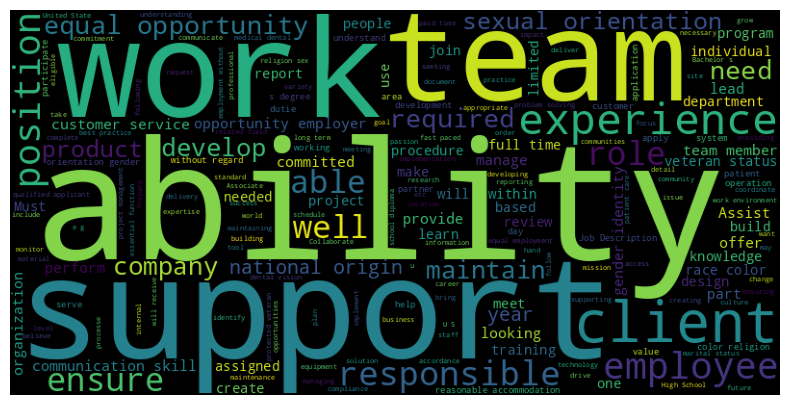

In [27]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Remote allowed ratio

In [28]:
job_posting["remote_allowed"].unique()
job_posting["remote_allowed"].fillna("Unknown", inplace=True)
remote_work_value = job_posting["remote_allowed"].value_counts()
remote_work_value

remote_allowed
Unknown    28444
1.0         4802
Name: count, dtype: int64

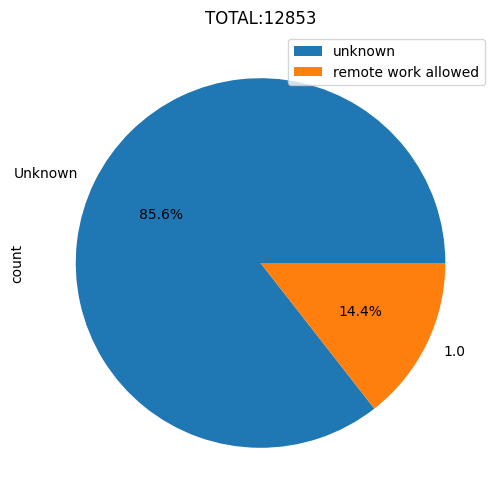

In [29]:
plt.figure(figsize=(9,6))
remote_work_value.plot(kind='pie',  autopct='%1.1f%%')
plt.title("TOTAL:12853")
plt.legend(["unknown", "remote work allowed"])
plt.show()

### Types of company beneifts

In [30]:
merged_jobs = pd.merge(job_posting, benefits, on='job_id', how='left')
merged_jobs.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped', 'inferred', 'type'],
      dtype='object')

<BarContainer object of 12 artists>

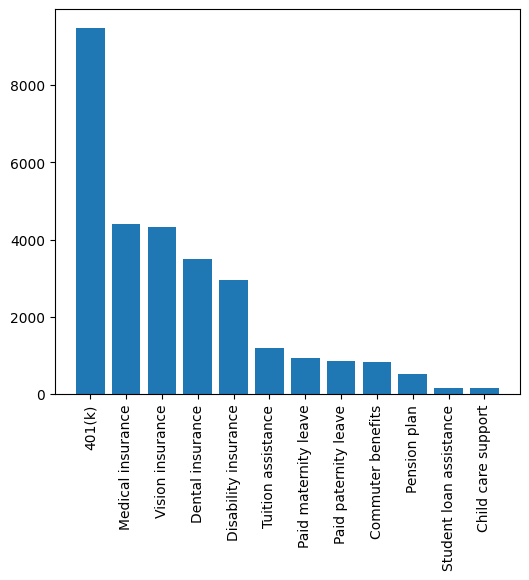

In [31]:
plt.figure(figsize=(6,5))
benefits_jobs = merged_jobs["type"].value_counts()
plt.xticks(rotation=90)
plt.bar(benefits_jobs.index, benefits_jobs.values)

Top 10 location of job_posting

<BarContainer object of 20 artists>

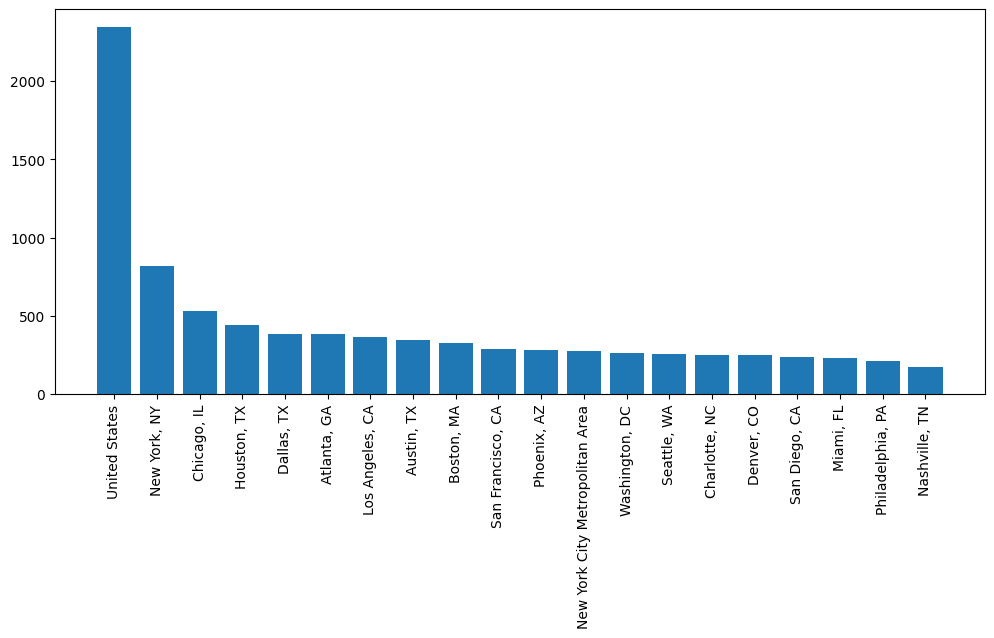

In [32]:
plt.figure(figsize=(12,5))
location = job_posting["location"].value_counts()
plt.xticks(rotation=90)
plt.bar(location.head(20).index, location.head(20).values)

In [33]:
companies["company_size"].value_counts()

company_size
5.0    2036
2.0    1984
1.0    1788
7.0    1392
3.0    1304
4.0    1049
6.0     703
Name: count, dtype: int64

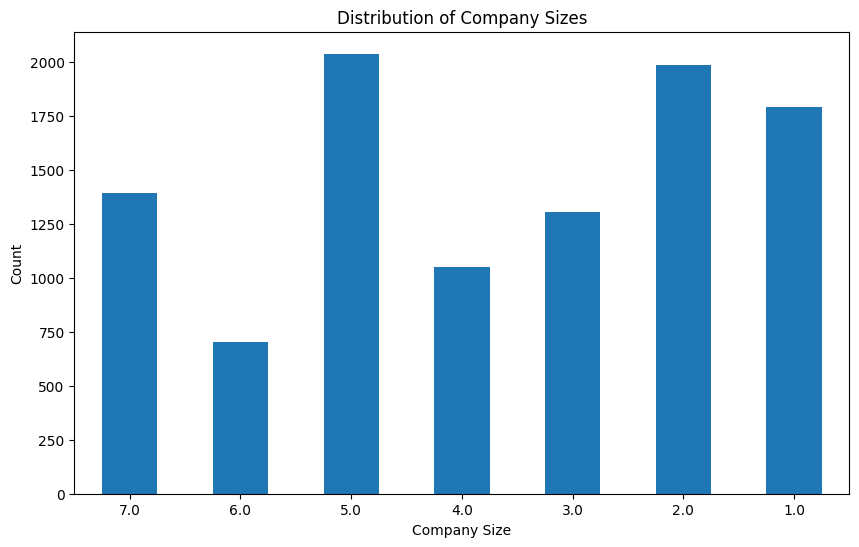

In [34]:
size_names = {
    1: 'Very Small',
    2: 'Small',
    3: 'Medium-Small',
    4: 'Medium',
    5: 'Medium-Large',
    6: 'Large',
    7: 'Very Large'
}
company_size_counts = companies['company_size'].value_counts().sort_index(ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
company_size_counts.plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Distribution of Company Sizes')
plt.xticks(rotation=0)
plt.show()

Compesation type and currency

In [35]:
job_posting["currency"].value_counts()

currency
USD    13352
Name: count, dtype: int64

In [36]:
job_posting["compensation_type"].value_counts()

compensation_type
BASE_SALARY    13352
Name: count, dtype: int64

# Caclulate Salary


## Visualize salary distribution by industry and experience
(will only visualize average salary)

### Preprocessing

Count of Max, Average, Min Salary

In [37]:
max_salary_count = job_posting['max_salary'].count()
med_salary_count = job_posting['med_salary'].count()
min_salary_count = job_posting['min_salary'].count()
print(max_salary_count ,med_salary_count, min_salary_count)

11111 2241 11111


Count each  pay period

In [38]:
job_posting["pay_period"].value_counts()

pay_period
YEARLY     8009
HOURLY     5036
MONTHLY     224
WEEKLY       82
ONCE          1
Name: count, dtype: int64

Count of expereince

In [39]:
job_posting["formatted_experience_level"].value_counts()

formatted_experience_level
Mid-Senior level    11258
Entry level          7969
Associate            2793
Director             1354
Internship            387
Executive             304
Name: count, dtype: int64

In [40]:
job_posting["work_type"].value_counts()

work_type
FULL_TIME     26900
CONTRACT       3459
PART_TIME      2244
TEMPORARY       260
INTERNSHIP      228
OTHER           110
VOLUNTEER        45
Name: count, dtype: int64

In [41]:
job_posting[["pay_period","formatted_experience_level","work_type","job_id","company_id"]]

,pay_period,formatted_experience_level,work_type,job_id,company_id
0,MONTHLY,Entry level,FULL_TIME,3757940104,553718.0
1,NaN,NaN,FULL_TIME,3757940025,2192142.0
2,NaN,NaN,FULL_TIME,3757938019,474443.0
3,HOURLY,Entry level,FULL_TIME,3757938018,18213359.0
4,YEARLY,Mid-Senior level,FULL_TIME,3757937095,437225.0
...,...,...,...,...,...
33241,NaN,NaN,FULL_TIME,133114754,77766802.0
33242,NaN,NaN,FULL_TIME,108965123,NaN
33243,NaN,NaN,FULL_TIME,102339515,52132271.0
33244,YEARLY,NaN,FULL_TIME,85008768,NaN


Extract rows of FULL_TIME empolyee

In [42]:
#If it satisfies two conditions, than add it to salary dataframe.
col = ['job_id', 'min_salary', 'med_salary', 'max_salary', 'pay_period', 'formatted_experience_level']
condition1 = (job_posting['work_type'] == 'FULL_TIME')
condition2 = (job_posting['pay_period'].isin(['YEARLY', 'HOURLY', 'MONTHLY', 'WEEKLY']))

salary = job_posting.loc[condition1 & condition2, col]

Add industry names

In [43]:
#The merge column is industry_id
salary = salary.merge(job_industries, on="job_id")
salary = salary.merge(industries, on="industry_id")

Change min-max salary to average and add it to salary model

In [44]:
salary["salary"] = (salary["min_salary"] + salary["max_salary"]) / 2
salary["salary"] = salary["salary"].where(salary["salary"].notna(), salary["med_salary"])
salary = salary.drop(columns=["min_salary", "med_salary", "max_salary", "industry_id"])
salary

,job_id,pay_period,formatted_experience_level,industry_name,salary
0,3757940104,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000
1,3757912704,YEARLY,Mid-Senior level,Medical Equipment Manufacturing,112500.000
2,3757912173,HOURLY,NaN,Medical Equipment Manufacturing,24.700
3,3757909542,YEARLY,NaN,Medical Equipment Manufacturing,86200.000
4,3757754488,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000
...,...,...,...,...,...
15453,3693045025,HOURLY,NaN,Recreational Facilities,28.435
15454,3693586570,YEARLY,Mid-Senior level,Rail Transportation,126850.000
15455,3693580926,HOURLY,Entry level,Rail Transportation,25.550
15456,3693073585,HOURLY,NaN,Alternative Dispute Resolution,19.000


Unify pay period


Calculate each time by simply converting it to years.

In [45]:
def calc_annual_salary(row):
    if row['pay_period'] == 'YEARLY':
        return row['salary']
    elif row['pay_period'] == 'MONTHLY':
        return row['salary'] * 12 # 12 MONTHS IN A YEAR
    elif row['pay_period'] == 'WEEKLY':
        return row['salary'] * 52 # 52 WEEKS IN A YEAR
    elif row['pay_period'] == 'HOURLY':
        return row['salary'] * 2080 # 2080 HOURS FULL-TIME HOURS IN A YEAR
    else:
        return none

salary['annual_salary'] = salary.apply(calc_annual_salary, axis = 1)
salary

,job_id,pay_period,formatted_experience_level,industry_name,salary,annual_salary
0,3757940104,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0
1,3757912704,YEARLY,Mid-Senior level,Medical Equipment Manufacturing,112500.000,112500.0
2,3757912173,HOURLY,NaN,Medical Equipment Manufacturing,24.700,51376.0
3,3757909542,YEARLY,NaN,Medical Equipment Manufacturing,86200.000,86200.0
4,3757754488,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0
...,...,...,...,...,...,...
15453,3693045025,HOURLY,NaN,Recreational Facilities,28.435,59144.8
15454,3693586570,YEARLY,Mid-Senior level,Rail Transportation,126850.000,126850.0
15455,3693580926,HOURLY,Entry level,Rail Transportation,25.550,53144.0
15456,3693073585,HOURLY,NaN,Alternative Dispute Resolution,19.000,39520.0


Drop NA value and 0 salary.

In [46]:
salary = salary[(salary['annual_salary'] != 0) & (salary['annual_salary'].notna())]
salary

,job_id,pay_period,formatted_experience_level,industry_name,salary,annual_salary
0,3757940104,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0
1,3757912704,YEARLY,Mid-Senior level,Medical Equipment Manufacturing,112500.000,112500.0
2,3757912173,HOURLY,NaN,Medical Equipment Manufacturing,24.700,51376.0
3,3757909542,YEARLY,NaN,Medical Equipment Manufacturing,86200.000,86200.0
4,3757754488,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0
...,...,...,...,...,...,...
15453,3693045025,HOURLY,NaN,Recreational Facilities,28.435,59144.8
15454,3693586570,YEARLY,Mid-Senior level,Rail Transportation,126850.000,126850.0
15455,3693580926,HOURLY,Entry level,Rail Transportation,25.550,53144.0
15456,3693073585,HOURLY,NaN,Alternative Dispute Resolution,19.000,39520.0


The difference between the maximum and minimum annual salary is large, and the numbers themselves are large, so we logarithmize them.

In [47]:
salary['log_annual_salary'] = np.log(salary['annual_salary'])

<ipython-input-47-694462ccd1ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['log_annual_salary'] = np.log(salary['annual_salary'])


In [48]:
salary

,job_id,pay_period,formatted_experience_level,industry_name,salary,annual_salary,log_annual_salary
0,3757940104,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0,11.050890
1,3757912704,YEARLY,Mid-Senior level,Medical Equipment Manufacturing,112500.000,112500.0,11.630709
2,3757912173,HOURLY,NaN,Medical Equipment Manufacturing,24.700,51376.0,10.846926
3,3757909542,YEARLY,NaN,Medical Equipment Manufacturing,86200.000,86200.0,11.364425
4,3757754488,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0,11.050890
...,...,...,...,...,...,...,...
15453,3693045025,HOURLY,NaN,Recreational Facilities,28.435,59144.8,10.987744
15454,3693586570,YEARLY,Mid-Senior level,Rail Transportation,126850.000,126850.0,11.750761
15455,3693580926,HOURLY,Entry level,Rail Transportation,25.550,53144.0,10.880760
15456,3693073585,HOURLY,NaN,Alternative Dispute Resolution,19.000,39520.0,10.584562


### Annual Salary Distribution

### Visualize the distribution of average salaries by experience and industry

As there are too many industries, we will vizualize top 20 industries.

In [49]:
most20_employee = salary["industry_name"].value_counts().head(20).index
most20_employee

Index(['Hospitals and Health Care', 'Staffing and Recruiting',
       'IT Services and IT Consulting', 'Financial Services',
       'Software Development', 'Technology, Information and Internet',
       'Retail', 'Construction', 'Insurance', 'Manufacturing',
       'Non-profit Organizations', 'Real Estate', 'Telecommunications',
       'Accounting', 'Advertising Services', 'Food and Beverage Services',
       'Law Practice', 'Government Administration', 'Banking',
       'Business Consulting and Services'],
      dtype='object', name='industry_name')

Merging top 20 indsutires and annual salaries

Draw Boxplot to the see the distributuon and find outliers.

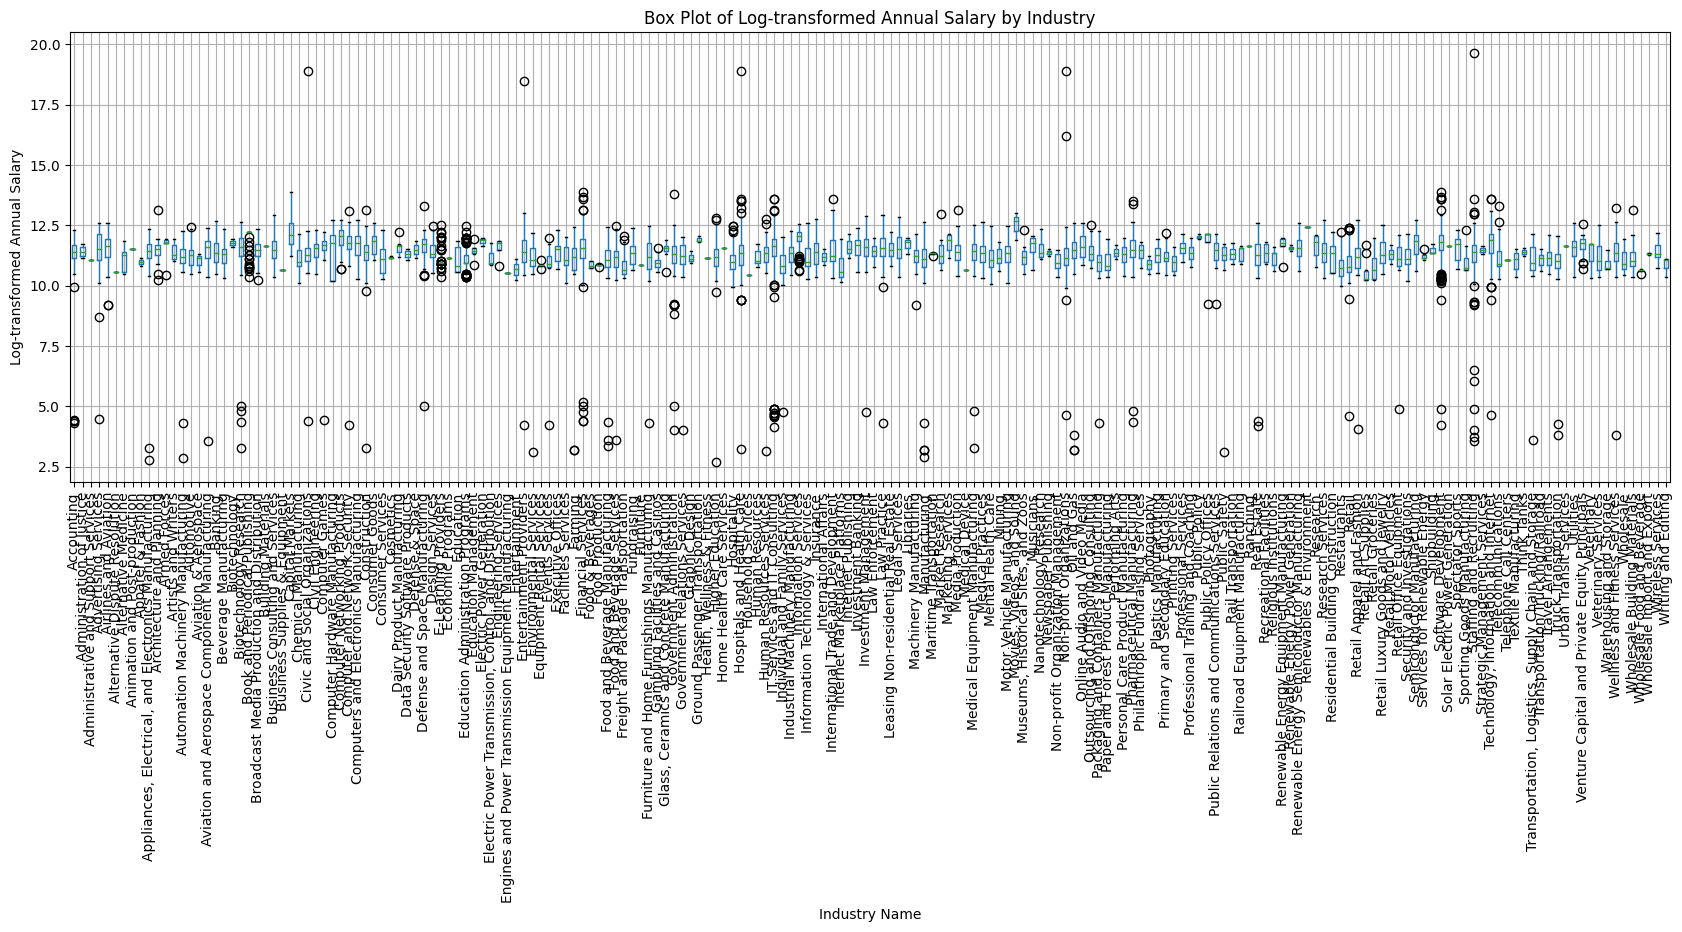

In [50]:
ax = salary.boxplot(column='log_annual_salary', by='industry_name', figsize=(20, 6))
plt.title('Box Plot of Log-transformed Annual Salary by Industry')
plt.suptitle('')
plt.xlabel('Industry Name')
plt.ylabel('Log-transformed Annual Salary')
plt.xticks(rotation=90)
plt.show()

Since the currency type is USD, we'll follow the statistics for Americans. According to Google, the average annual salary of an American is about $53,490. If we logarithmize this, we get a value of about 11.257. (We use natural logarithms because the base of np.log is the irrational number e.) Also, we can see that the graph is somewhat divided around 7.5 and 15.0, so we consider anything below 7.5 and above 15.0 to be outliers.

In [51]:
salary = salary[salary['log_annual_salary'] >= 7.5]
salary = salary[salary['log_annual_salary'] <= 15]
salary

,job_id,pay_period,formatted_experience_level,industry_name,salary,annual_salary,log_annual_salary
0,3757940104,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0,11.050890
1,3757912704,YEARLY,Mid-Senior level,Medical Equipment Manufacturing,112500.000,112500.0,11.630709
2,3757912173,HOURLY,NaN,Medical Equipment Manufacturing,24.700,51376.0,10.846926
3,3757909542,YEARLY,NaN,Medical Equipment Manufacturing,86200.000,86200.0,11.364425
4,3757754488,MONTHLY,Entry level,Medical Equipment Manufacturing,5250.000,63000.0,11.050890
...,...,...,...,...,...,...,...
15453,3693045025,HOURLY,NaN,Recreational Facilities,28.435,59144.8,10.987744
15454,3693586570,YEARLY,Mid-Senior level,Rail Transportation,126850.000,126850.0,11.750761
15455,3693580926,HOURLY,Entry level,Rail Transportation,25.550,53144.0,10.880760
15456,3693073585,HOURLY,NaN,Alternative Dispute Resolution,19.000,39520.0,10.584562


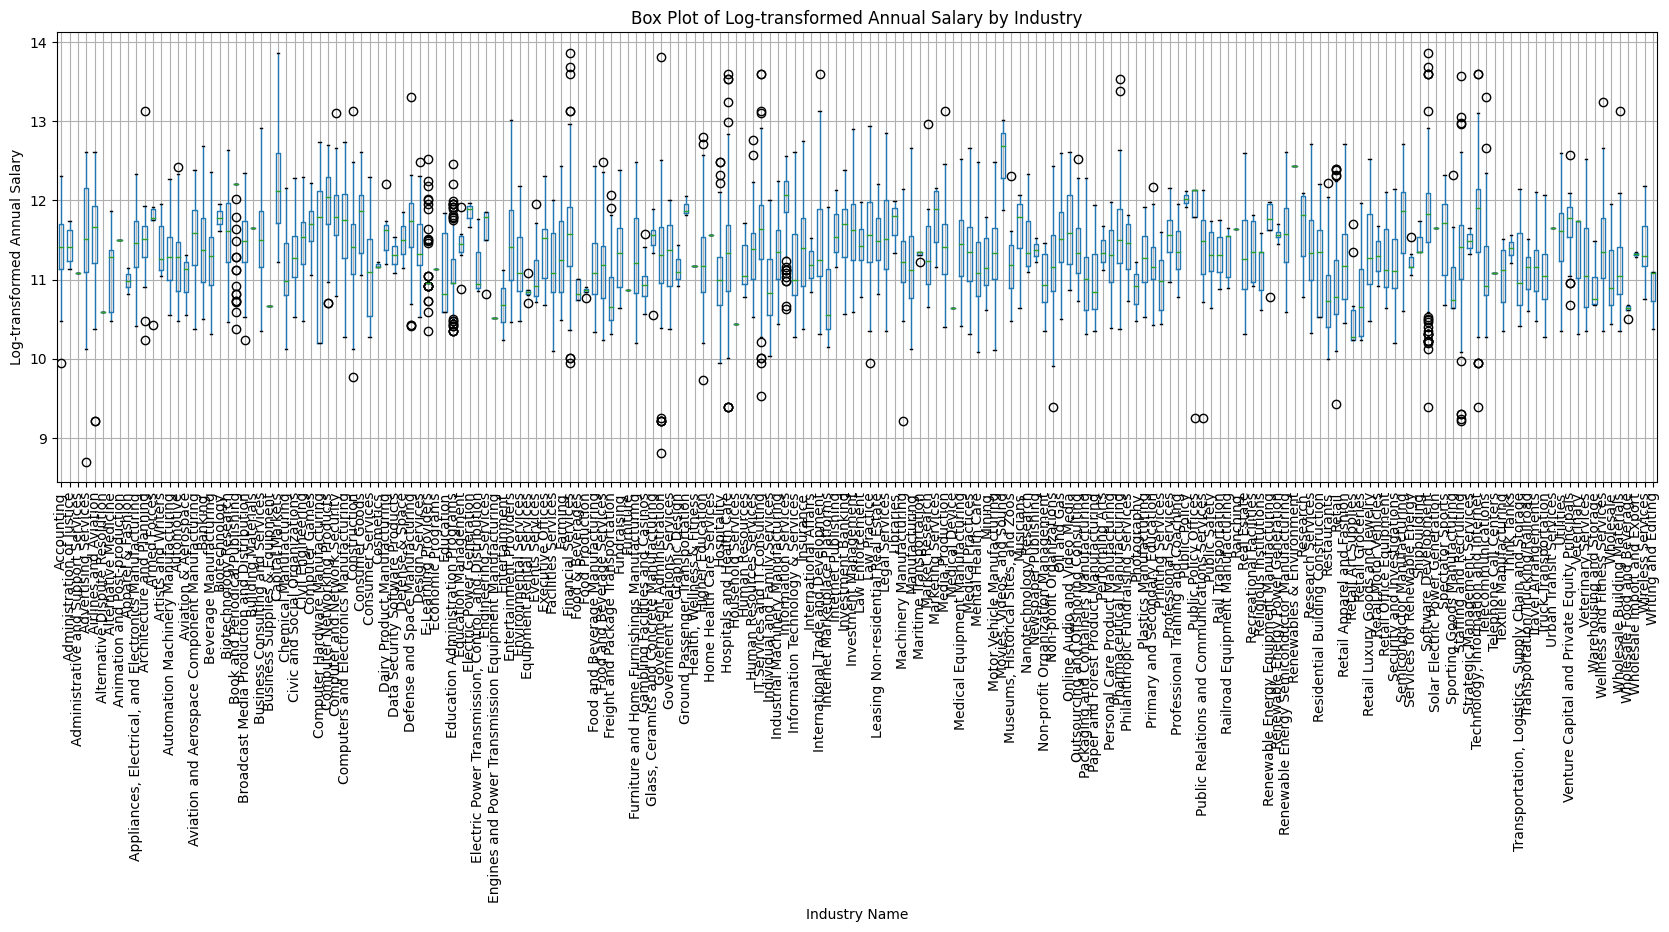

In [52]:
ax = salary.boxplot(column='log_annual_salary', by='industry_name', figsize=(20, 6))
plt.title('Box Plot of Log-transformed Annual Salary by Industry')
plt.suptitle('')
plt.xlabel('Industry Name')
plt.ylabel('Log-transformed Annual Salary')
plt.xticks(rotation=90)
plt.show()

####Comparison graph of salary averages for the top 20 industries

####Comparison graph of salary averages for the experience

In [53]:
top_20_industry_salary = salary[salary['industry_name'].isin(most20_employee)]
top_20_industry_salary

,job_id,pay_period,formatted_experience_level,industry_name,salary,annual_salary,log_annual_salary
171,3757938018,HOURLY,Entry level,Non-profit Organizations,22.270,46321.6,10.743364
172,3757936097,HOURLY,Entry level,Non-profit Organizations,19.300,40144.0,10.600228
173,3757934423,HOURLY,Entry level,Non-profit Organizations,19.300,40144.0,10.600228
174,3757913569,HOURLY,Associate,Non-profit Organizations,27.285,56752.8,10.946460
175,3757766646,YEARLY,Entry level,Non-profit Organizations,65800.000,65800.0,11.094375
...,...,...,...,...,...,...,...
12615,3693047935,MONTHLY,Associate,Government Administration,6317.000,75804.0,11.235906
12616,3693044748,MONTHLY,Associate,Government Administration,6212.500,74550.0,11.219225
12617,3693044578,YEARLY,Associate,Government Administration,124866.000,124866.0,11.734996
12618,3690841034,YEARLY,NaN,Government Administration,97902.500,97902.5,11.491727


In [54]:
exp_order_salary = top_20_industry_salary[['formatted_experience_level', 'annual_salary']] \
.groupby('formatted_experience_level') \
.mean() \
.sort_values('annual_salary', ascending=True) \
.rename(columns={'annual_salary': 'Mean Annual Salary ($)'}) \
.round(0)

exp_order_salary.index.name = 'Experience Level'
exp_order_salary

,Mean Annual Salary ($)
Experience Level,
Internship,63961.0
Entry level,68585.0
Associate,88380.0
Mid-Senior level,120405.0
Director,172288.0
Executive,228424.0


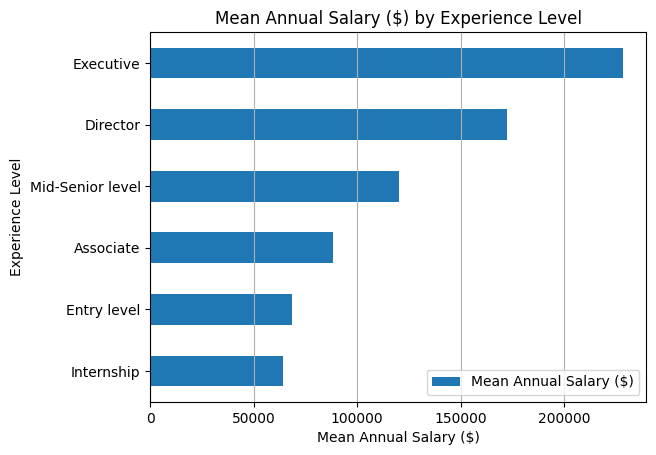

In [55]:
exp_order_salary.plot(kind='barh')
plt.xlabel('Mean Annual Salary ($)')
plt.title('Mean Annual Salary ($) by Experience Level')

# Adding grid lines
plt.grid(axis='x')

plt.show()

In [56]:
industry_order_salary = top_20_industry_salary[['industry_name', 'annual_salary']] \
.groupby('industry_name') \
.mean() \
.sort_values('annual_salary', ascending=True) \
.rename(columns={'annual_salary': 'Mean Annual Salary ($)'}) \
.round(0)
industry_order_salary

,Mean Annual Salary ($)
industry_name,
Retail,64952.0
Food and Beverage Services,76777.0
Telecommunications,79014.0
Manufacturing,81686.0
Non-profit Organizations,81986.0
Government Administration,92947.0
Real Estate,93030.0
Staffing and Recruiting,95352.0
Hospitals and Health Care,95842.0


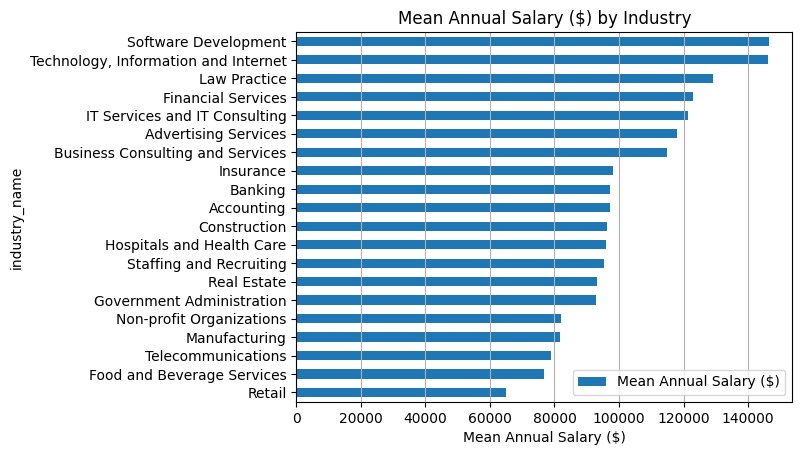

In [57]:
industry_order_salary.plot(kind='barh')

plt.xlabel('Mean Annual Salary ($)')
plt.title('Mean Annual Salary ($) by Industry')

plt.grid(axis='x')
plt.show()

####Final graph of average salary based on experience and industry

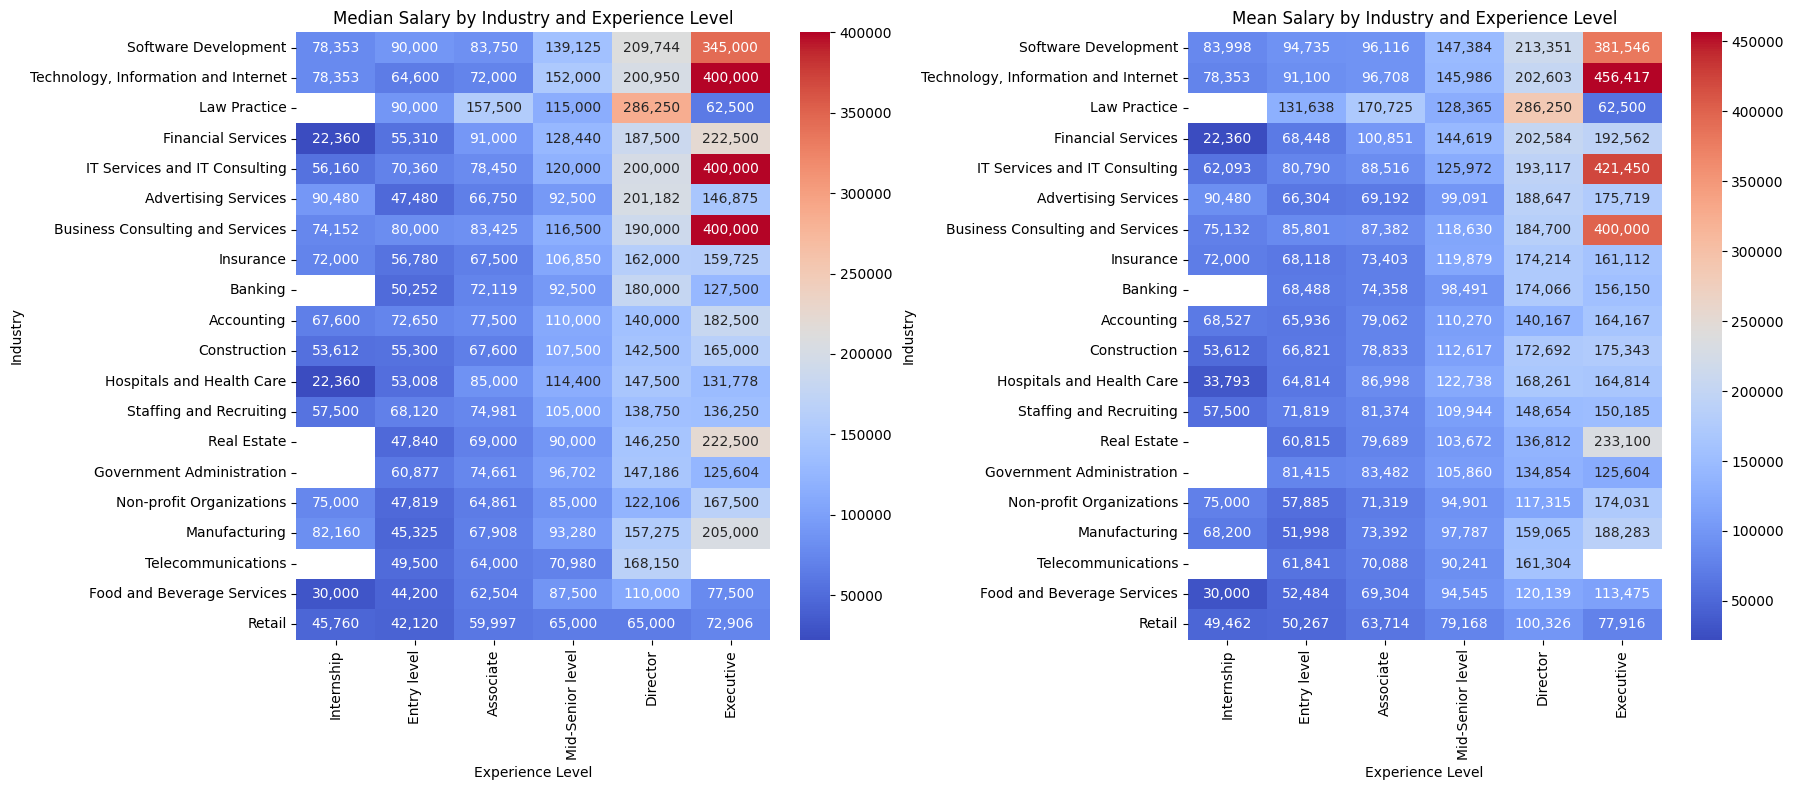

In [58]:
industry_order = [
    'Software Development',
    'Technology, Information and Internet',
    'Law Practice',
    'Financial Services',
    'IT Services and IT Consulting',
    'Advertising Services',
    'Business Consulting and Services',
    'Insurance',
    'Banking',
    'Accounting',
    'Construction',
    'Hospitals and Health Care',
    'Staffing and Recruiting',
    'Real Estate',
    'Government Administration',
    'Non-profit Organizations',
    'Manufacturing',
    'Telecommunications',
    'Food and Beverage Services',
    'Retail'
]

experience_level_order = [
    'Internship',
    'Entry level',
    'Associate',
    'Mid-Senior level',
    'Director',
    'Executive'
]

# Group by 'industry_name' and 'formatted_experience_level' and calculate median and mean salary
median_salary = top_20_industry_salary.groupby(['industry_name', 'formatted_experience_level'])['annual_salary'].median().reset_index()
mean_salary = top_20_industry_salary.groupby(['industry_name', 'formatted_experience_level'])['annual_salary'].mean().reset_index()

# Pivot the data to prepare for the heatmap
median_pivot = median_salary.pivot(index='industry_name', columns='formatted_experience_level', values='annual_salary')
mean_pivot = mean_salary.pivot(index='industry_name', columns='formatted_experience_level', values='annual_salary')

# Reorder the pivot tables according to the specified industry and experience level order
median_pivot = median_pivot.reindex(industry_order)
mean_pivot = mean_pivot.reindex(industry_order)

median_pivot = median_pivot[experience_level_order]
mean_pivot = mean_pivot[experience_level_order]

# Custom formatter to add commas to the annotations
def with_commas(val):
    return "{:,}".format(int(val))

# Create and display the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Median salary heatmap
sns.heatmap(median_pivot, annot=True, cmap="coolwarm", ax=axes[0], fmt='g')
axes[0].set_title('Median Salary by Industry and Experience Level')
axes[0].set_ylabel('Industry')
axes[0].set_xlabel('Experience Level')

# Mean salary heatmap
sns.heatmap(mean_pivot, annot=True, cmap="coolwarm", ax=axes[1], fmt='g')
axes[1].set_title('Mean Salary by Industry and Experience Level')
axes[1].set_ylabel('Industry')
axes[1].set_xlabel('Experience Level')

# Apply the custom formatter to each text annotation
for i in range(2):
  for text in axes[i].texts:
    text.set_text(with_commas(float(text.get_text())))

plt.tight_layout()
plt.show()


In [59]:
# df = ordered[['experience_level_encoded', 'views', 'applies', 'industry_name_encoded','annual_salary']]

# x = df['views']
# z = df['annual_salary']
# c = df['experience_level_encoded']
# y = df['industry_name_encoded']

# # 3D 산점도 그리기
# fig = plt.figure(figsize=(15, 10))

# ax1 = fig.add_subplot(121, projection='3d')
# sc1 = ax1.scatter(x, y, z, c=c, cmap='viridis')
# ax1.set_xlabel('views')
# ax1.set_ylabel('industry_name_encoded')
# ax1.set_zlabel('annual_salary')
# ax1.view_init(5, 00)
# ax1.set_title('View at Elev=12, Azim=20')

# ax2 = fig.add_subplot(122, projection='3d')
# sc2 = ax2.scatter(x, y, z, c=c, cmap='viridis')
# ax2.set_xlabel('views')
# ax2.set_ylabel('industry_name_encoded')
# ax2.set_zlabel('annual_salary')
# ax2.view_init(0, 85)
# ax2.set_title('View at Elev=20, Azim=80')

# fig.colorbar(sc2, ax=[ax1, ax2], label='experience_level_encoded')

# plt.show()


In [60]:
# view = ordered[['views', 'annual_salary']] \
# .groupby('views') \
# .mean() \
# .sort_values('views', ascending=True) \
# .rename(columns={'annual_salary': 'Mean Annual Salary ($)'}) \
# .round(0)

# view = view.tail(50)

# view.plot(kind='barh')

# plt.xlabel('Mean Annual Salary ($)')
# plt.title('Mean Annual Salary ($) by Industry')

# plt.grid(axis='x')
# plt.show()

## Perdict average salary

### Make dataframe for salary prediction.

We weill predict salary by experience_level, view, scappred, industry_name, skill, company_size, country, benefit type

In [61]:
col = ['job_id', 'min_salary', 'med_salary', 'max_salary', 'pay_period', 'formatted_experience_level','company_id', 'views', 'listed_time', 'applies']
condition1 = (job_posting['work_type'] == 'FULL_TIME')
condition2 = (job_posting['pay_period'].isin(['YEARLY', 'HOURLY', 'MONTHLY', 'WEEKLY']))
salary_for_model = job_posting.loc[condition1 & condition2, col]
salary_for_model = salary_for_model.merge(job_industries, on="job_id")
salary_for_model = salary_for_model.merge(industries, on="industry_id")
salary_for_model["log_annual_salary"] = salary["log_annual_salary"]
salary_for_model["annual_salary"] = salary["annual_salary"]
salary_for_model = salary_for_model[salary_for_model['log_annual_salary'] >= 7.5]
salary_for_model = salary_for_model[salary_for_model['log_annual_salary'] <= 15]
salary_for_model = salary_for_model.merge(job_skills, on="job_id")
salary_for_model = salary_for_model.merge(companies[['company_id', 'company_size','country']], on="company_id")
salary_for_model = salary_for_model.merge(benefits[["job_id", "type"]], on = "job_id")
salary_for_model["log_listed_time"] = np.log(salary_for_model["listed_time"])
salary_for_model.drop(columns=["min_salary","med_salary","max_salary","pay_period","company_id","industry_id","job_id","listed_time"], inplace=True)
salary_for_model.dropna(inplace=True)
salary_for_model

,formatted_experience_level,views,applies,industry_name,log_annual_salary,annual_salary,skill_abr,company_size,country,type,log_listed_time
2,Entry level,2.0,1.0,Medical Equipment Manufacturing,11.050890,63000.0,HCPR,5.0,US,Medical insurance,28.161096
3,Entry level,2.0,1.0,Medical Equipment Manufacturing,11.050890,63000.0,HCPR,5.0,US,Disability insurance,28.161096
4,Mid-Senior level,3.0,1.0,Medical Equipment Manufacturing,11.630709,112500.0,SALE,2.0,US,Medical insurance,28.161102
5,Mid-Senior level,3.0,1.0,Medical Equipment Manufacturing,11.630709,112500.0,SALE,2.0,US,Vision insurance,28.161102
6,Mid-Senior level,3.0,1.0,Medical Equipment Manufacturing,11.630709,112500.0,SALE,2.0,US,Dental insurance,28.161102
...,...,...,...,...,...,...,...,...,...,...,...
37027,Mid-Senior level,12.0,1.0,Rail Transportation,11.750761,126850.0,MGMT,7.0,US,Disability insurance,28.157423
37028,Mid-Senior level,12.0,1.0,Rail Transportation,11.750761,126850.0,MNFC,7.0,US,401(k),28.157423
37029,Mid-Senior level,12.0,1.0,Rail Transportation,11.750761,126850.0,MNFC,7.0,US,Disability insurance,28.157423
37032,Entry level,15.0,2.0,Building Materials,11.656853,115480.0,ENG,5.0,US,401(k),28.157370


#### Label Encoder order

We will apply label encoding to string data. We will sort each string data by average annual salary and number them in that order.

In [62]:
sort_col = ["formatted_experience_level", "industry_name", "skill_abr", "country", "type"]

exp_order = []
industry_order = []
skill_order = []
country_order = []
type_order = []

list_mapping = {
    "formatted_experience_level": exp_order,
    "industry_name": industry_order,
    "skill_abr": skill_order,
    "country": country_order,
    "type": type_order
}


for col in sort_col:
    mean_salaries = salary_for_model.groupby(col)['annual_salary'].mean()
    sorted_mean_salaries = mean_salaries.sort_values()
    print(sorted_mean_salaries)
    for item in sorted_mean_salaries.index:
        list_mapping[col].append(item)

exp_order = {level: idx for idx, level in enumerate(exp_order)}
industry_order = {level: idx for idx, level in enumerate(industry_order)}
skill_order = {level: idx for idx, level in enumerate(skill_order)}
country_order = {level: idx for idx, level in enumerate(country_order)}
type_order = {level: idx for idx, level in enumerate(type_order)}


formatted_experience_level
Entry level          68471.089326
Internship           84959.948718
Associate            90148.880913
Mid-Senior level    117610.457688
Director            156538.207966
Executive           206709.785120
Name: annual_salary, dtype: float64
industry_name
Retail Art Supplies                                        28080.000000
Veterinary                                                 30160.000000
Transportation/Trucking/Railroad                           43680.000000
Beverage Manufacturing                                     49920.000000
Electric Power Transmission, Control, and Distribution     52000.000000
                                                              ...      
Marketing Services                                        180000.000000
Dairy Product Manufacturing                               193437.500000
Farming                                                   195000.000000
Residential Building Construction                         199900.000000

#### The final dataframe to apply to your model

Has two dataframe. One is based on annual salary and one is random labeling

In [63]:
ordered = salary_for_model.copy()
ordered['experience_level_encoded'] = ordered['formatted_experience_level'].map(exp_order)
ordered['industry_name_encoded'] = ordered['industry_name'].map(industry_order)
ordered['country_encoded'] = ordered['country'].map(country_order)
ordered['skill_abr_encoded'] = ordered['skill_abr'].map(skill_order)
ordered["type_encoded"] = ordered["type"].map(type_order)
ordered = ordered.drop('industry_name', axis=1)
ordered = ordered.drop('country', axis=1)
ordered = ordered.drop('formatted_experience_level', axis=1)
ordered = ordered.drop('skill_abr', axis=1)
ordered = ordered.drop('type', axis=1)
ordered.dropna(inplace=True)
ordered

,views,applies,log_annual_salary,annual_salary,company_size,log_listed_time,experience_level_encoded,industry_name_encoded,country_encoded,skill_abr_encoded,type_encoded
2,2.0,1.0,11.050890,63000.0,5.0,28.161096,0,44,14,4,6
3,2.0,1.0,11.050890,63000.0,5.0,28.161096,0,44,14,4,11
4,3.0,1.0,11.630709,112500.0,2.0,28.161102,3,44,14,18,6
5,3.0,1.0,11.630709,112500.0,2.0,28.161102,3,44,14,18,5
6,3.0,1.0,11.630709,112500.0,2.0,28.161102,3,44,14,18,4
...,...,...,...,...,...,...,...,...,...,...,...
37027,12.0,1.0,11.750761,126850.0,7.0,28.157423,3,113,14,24,11
37028,12.0,1.0,11.750761,126850.0,7.0,28.157423,3,113,14,10,3
37029,12.0,1.0,11.750761,126850.0,7.0,28.157423,3,113,14,10,11
37032,15.0,2.0,11.656853,115480.0,5.0,28.157370,0,100,14,33,3


random label encoding

In [64]:
random = salary_for_model.copy()
le = LabelEncoder()
X_encoded = le.fit_transform(random["industry_name"])
random['industry_name_encoded'] = X_encoded

X_encoded = le.fit_transform(random["country"])
random['country_encoded'] = X_encoded

X_encoded = le.fit_transform(random["formatted_experience_level"])
random['formatted_experience_level_encoded'] = X_encoded

X_encoded = le.fit_transform(random["skill_abr"])
random['skill_abr_encoded'] = X_encoded

X_encoded = le.fit_transform(random["type"])
random['type_encoded'] = X_encoded

random = random.drop('industry_name', axis=1)
random = random.drop('country', axis=1)
random = random.drop('formatted_experience_level', axis=1)
random = random.drop('skill_abr', axis=1)
random = random.drop('type', axis=1)
random

,views,applies,log_annual_salary,annual_salary,company_size,log_listed_time,industry_name_encoded,country_encoded,formatted_experience_level_encoded,skill_abr_encoded,type_encoded
2,2.0,1.0,11.050890,63000.0,5.0,28.161096,84,25,2,14,5
3,2.0,1.0,11.050890,63000.0,5.0,28.161096,84,25,2,14,4
4,3.0,1.0,11.630709,112500.0,2.0,28.161102,84,25,5,29,5
5,3.0,1.0,11.630709,112500.0,2.0,28.161102,84,25,5,29,11
6,3.0,1.0,11.630709,112500.0,2.0,28.161102,84,25,5,29,3
...,...,...,...,...,...,...,...,...,...,...,...
37027,12.0,1.0,11.750761,126850.0,7.0,28.157423,108,25,5,18,4
37028,12.0,1.0,11.750761,126850.0,7.0,28.157423,108,25,5,19,0
37029,12.0,1.0,11.750761,126850.0,7.0,28.157423,108,25,5,19,4
37032,15.0,2.0,11.656853,115480.0,5.0,28.157370,17,25,2,11,0


#### train_split

train = 0.8
test = 0.2
random_state = 2024

train split based on regression

In [65]:
X = ordered.drop(columns=['annual_salary','log_annual_salary'])
y = ordered['log_annual_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2024)

train split with random labeling

In [66]:
Xr = random.drop(columns=['annual_salary','log_annual_salary'])
yr = random['log_annual_salary']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state = 2024)

### Random Forest

#### Using Orderd Label Encoding dataframe

##### Using train_split

In [67]:
model = RandomForestRegressor(random_state=2024, bootstrap= True, max_depth=10, min_samples_leaf = 4, min_samples_split = 10, n_estimators =  400)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_ = mean_squared_error(y_test, y_pred)
mae_ = mean_absolute_error(y_test, y_pred)
rmse_ = np.sqrt(mse_)
r2_ = r2_score(y_test, y_pred)
n = len(y)
p = X.shape[1]
r2_adj_ = 1 - (1 - r2_) * ((n - 1) / (n - p - 1))
print(f'MSE: {mse_}')
print(f'RMSE: {rmse_}')
print(f'R²: {r2_}')
print(f'adj_R²: {r2_adj_}')
print(f'MAE: {mae_}')

MSE: 0.045085812675241144
RMSE: 0.21233420043704956
R²: 0.7964858111816249
adj_R²: 0.7963821888858925
MAE: 0.14650154937335833


In [68]:
df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
df_index = df.index
df_reset = df.reset_index(drop=True)
df_reset = df_reset.head(100)

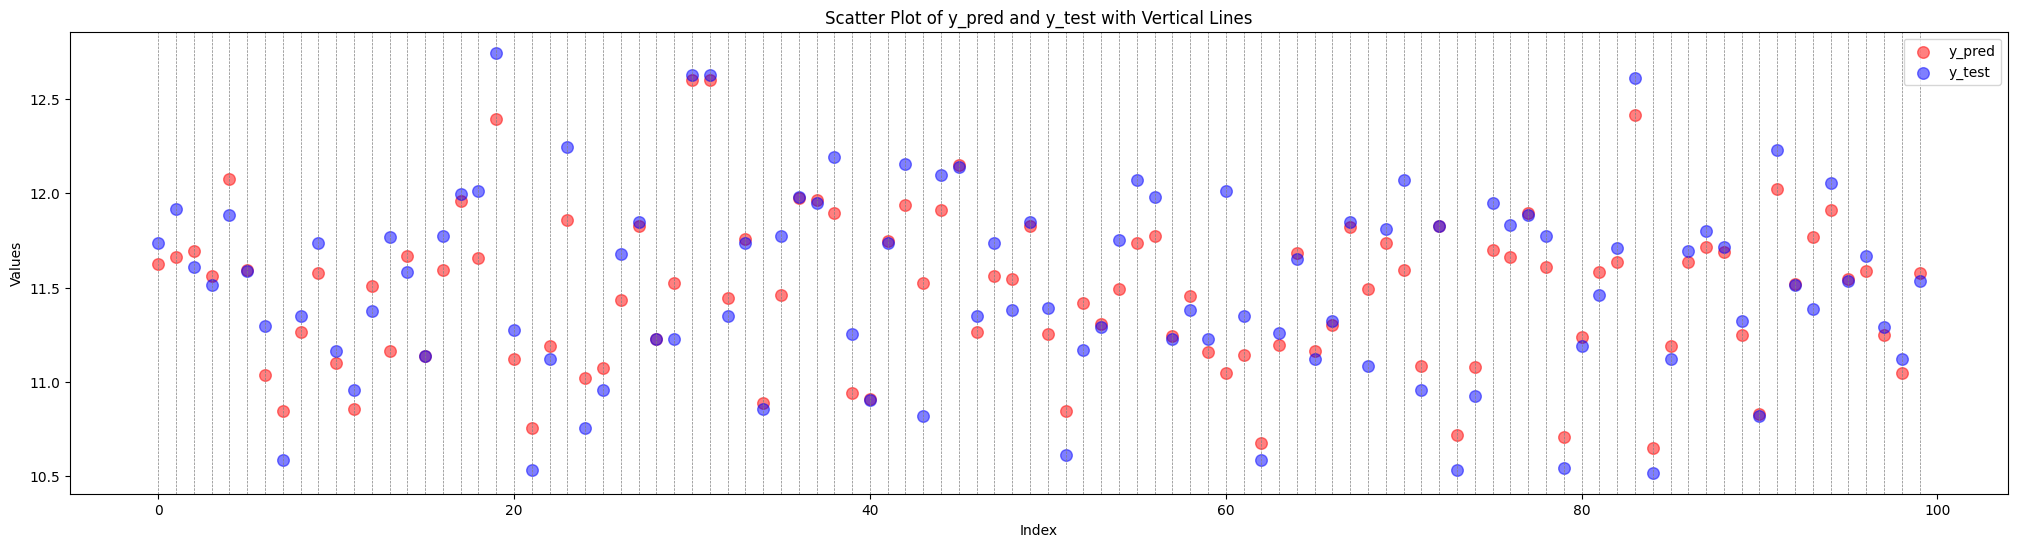

In [69]:
plt.figure(figsize=(25, 6))

plt.scatter(df_reset.index, df_reset['y_pred'], color='red', label='y_pred', s=70, alpha = 0.5)
plt.scatter(df_reset.index, df_reset['y_test'], color='blue', label='y_test', s=70, alpha = 0.5)


for x in df_reset.index:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)


plt.title('Scatter Plot of y_pred and y_test with Vertical Lines')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend()

plt.show()

##### More information of Random Forest

###### gridhSearch로 파라미터 찾기

In [70]:
# salary_for_model["annual_salary"] = salary["annual_salary"]

# salary_for_model.dropna(inplace=True)
# salary_for_model

# X = salary_for_model.drop(columns=['log_annual_salary','annual_salary'])
# y = salary_for_model['annual_salary']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2024)

# # 랜덤 포레스트 모델 초기화
# rf = RandomForestRegressor(random_state=42)

# # 최적화할 파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [200, 300, 400,450,500],
#     'max_depth': [10, 20, 30,40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # GridSearchCV 초기화
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# # 파라미터 최적화를 위한 모델 훈련
# grid_search.fit(X_train, y_train)

# # 최적 파라미터 출력
# print("최적 파라미터:", grid_search.best_params_)

# # 최적 파라미터로 훈련된 모델을 사용하여 테스트 데이터에 대한 성능 평가
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # 성능 평가
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# print(f"테스트 데이터의 MSE: {mse}")
# random_state=2024, bootstrap= True, max_depth=10, min_samples_leaf = 4, min_samples_split = 10, n_estimators =  400~500 -> 최적

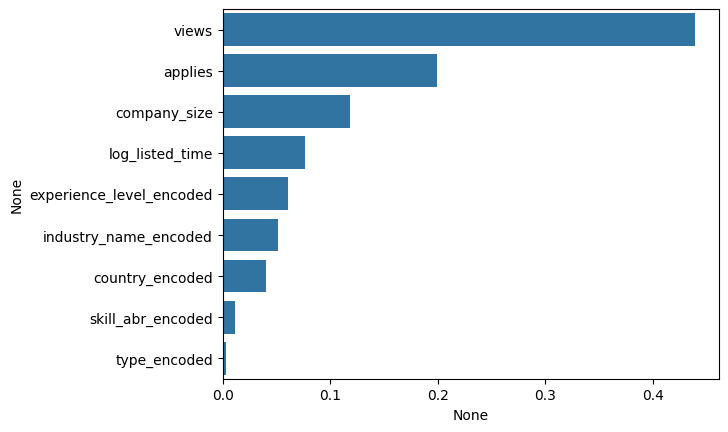

In [71]:
  %matplotlib inline

  feature_importances = model.feature_importances_

  ft_importances = pd.Series(feature_importances, index = X_train.columns)
  ft_importances = ft_importances.sort_values(ascending=False)

  # plt.figure(fig.size(12,10))
  sns.barplot(x=ft_importances, y= X_train.columns)
  plt.show()

##### Using K-FOLD

In [72]:
kf = KFold(n_splits=10, shuffle=True, random_state=2024)


model = RandomForestRegressor(random_state=2024, bootstrap=True, max_depth=12, min_samples_leaf=4, min_samples_split=10, n_estimators=400)


y_pred = cross_val_predict(model, X, y, cv=kf)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
n = len(y)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'adj_R²: {r2_adj}')
print(f'MAE: {mae}')

MSE: 0.030723890224004423
RMSE: 0.1752823157765906
R²: 0.8630669540337248
adj_R²: 0.8629972325235586
MAE: 0.11042424802347386


In [73]:
df = pd.DataFrame({'y_pred': y_pred, 'y_test': y})
df = df.loc[df_index]
df_reset = df.reset_index(drop=True)
df_reset = df_reset.head(100)
df

,y_pred,y_test
11389,11.603936,11.736069
17592,11.749427,11.918391
8116,11.668410,11.608236
18075,11.541043,11.512925
31536,12.101242,11.884489
...,...,...
8226,13.097046,13.097046
6634,11.571173,11.547327
31323,11.690503,11.830288
16846,11.766836,11.813030


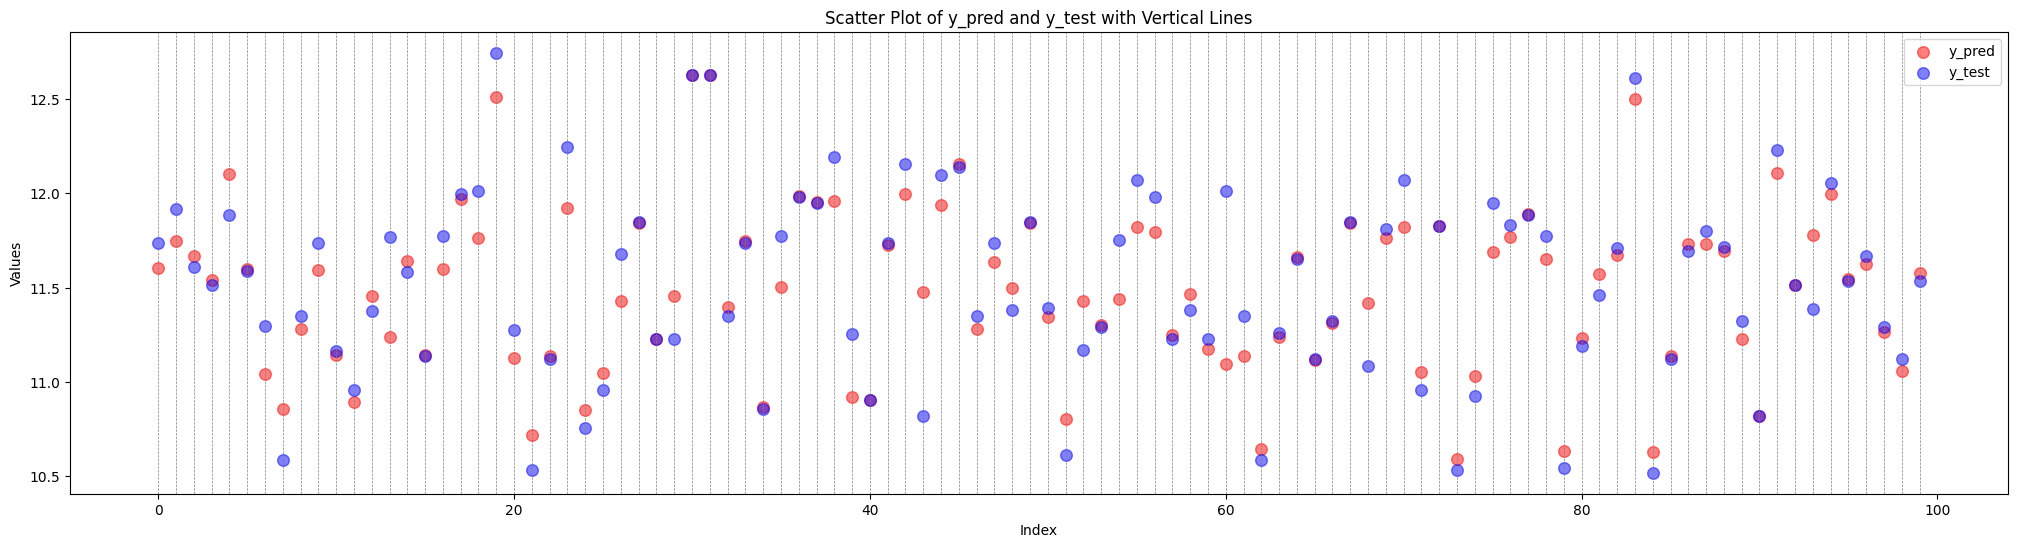

In [74]:
plt.figure(figsize=(25, 6))

plt.scatter(df_reset.index, df_reset['y_pred'], color='red', label='y_pred', s=70, alpha = 0.5)
plt.scatter(df_reset.index, df_reset['y_test'], color='blue', label='y_test', s=70, alpha = 0.5)


for x in df_reset.index:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)


plt.title('Scatter Plot of y_pred and y_test with Vertical Lines')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend()

plt.show()

#### Using randomized Label Encoding dataframe

In [75]:
model = RandomForestRegressor(random_state=2024, bootstrap= True, max_depth=10, min_samples_leaf = 4, min_samples_split = 10, n_estimators =  400)
model.fit(Xr_train, yr_train)

yr_pred = model.predict(Xr_test)

mse_ = mean_squared_error(yr_test, yr_pred)
mae_ = mean_absolute_error(yr_test, yr_pred)
rmse_ = np.sqrt(mse_)
r2_ = r2_score(yr_test, yr_pred)
n = len(y)
p = X.shape[1]
r2_adj_ = 1 - (1 - r2_) * ((n - 1) / (n - p - 1))
print(f'MSE: {mse_}')
print(f'RMSE: {rmse_}')
print(f'R²: {r2_}')
print(f'adj_R²: {r2_adj_}')
print(f'MAE: {mae_}')

MSE: 0.052505725809367625
RMSE: 0.22914127914753296
R²: 0.7629928449247738
adj_R²: 0.7628721691839004
MAE: 0.15365096813588555


### PolyNomialRegression train_split

In [76]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)


y_test_pred = model.predict(X_test_poly)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'MSE: {mse_test}')
print(f'R2: {r2}')
n = len(y_test)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'adj R²: {r2_adj}')
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse_test)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 0.09820053638361946
R2: 0.5567296824036951
adj R²: 0.5555988907771738
RMSE: 0.31336964815313473
MAE: 0.21834888260425828


In [77]:
df = pd.DataFrame({'y_pred': y_test_pred, 'y_test': y_test})
df_reset = df.reset_index(drop=True)
df_reset = df_reset.head(100)
df_reset

,y_pred,y_test
0,11.680462,11.736069
1,11.594707,11.918391
2,11.697141,11.608236
3,11.630836,11.512925
4,12.021878,11.884489
...,...,...
95,11.451699,11.537092
96,11.501764,11.669929
97,11.183384,11.289782
98,10.985980,11.119883


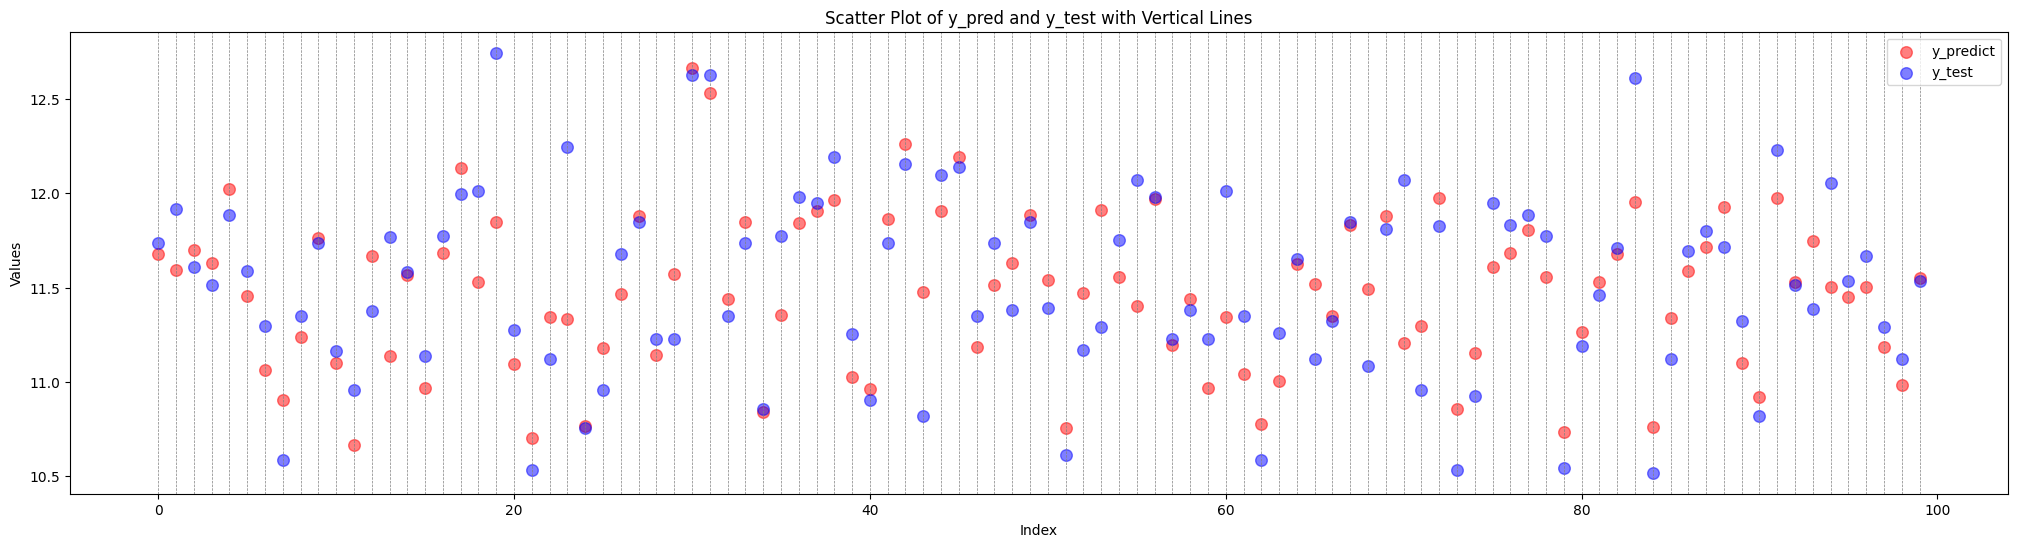

In [78]:
plt.figure(figsize=(25, 6))


plt.scatter(df_reset.index, df_reset['y_pred'], color='red', label='y_predict',s=70, alpha = 0.5)
plt.scatter(df_reset.index, df_reset['y_test'], color='blue', label='y_test',s=70, alpha = 0.5)

for x in df_reset.index:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)


plt.title('Scatter Plot of y_pred and y_test with Vertical Lines')
plt.xlabel('Index')
plt.ylabel('Values')


plt.legend()


plt.show()

### PolyNomial K_FOLD

In [79]:
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)

# Define KFold for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=2024)

# Initialize the model
model = LinearRegression()

# Perform cross-validation and get predictions
y_pred = cross_val_predict(model, X_poly_train, y_train, cv=kfold)

# Calculate evaluation metrics
mse_test = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'MSE: {mse_test}')
print(f'R2: {r2}')
n = len(y_train)
p = X_train.shape[1]
r2_adj = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'Adj R²: {r2_adj}')
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mse_test)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 0.14046877260024
R2: 0.375797892697072
Adj R²: 0.3754005367085499
RMSE: 0.3747916389145307
MAE: 0.22418729230871243


In [80]:
len(y_train)

14148

In [81]:
df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_train})
df_reset = df.reset_index(drop=True)
df_reset = df_reset.head(100)
df_reset

,y_pred,y_test
0,11.314161,10.968198
1,11.642321,10.858999
2,11.921704,11.849398
3,11.114644,10.691945
4,12.003177,11.849398
...,...,...
95,11.566343,11.320554
96,11.085400,11.119883
97,11.440697,12.054406
98,11.241207,11.434964


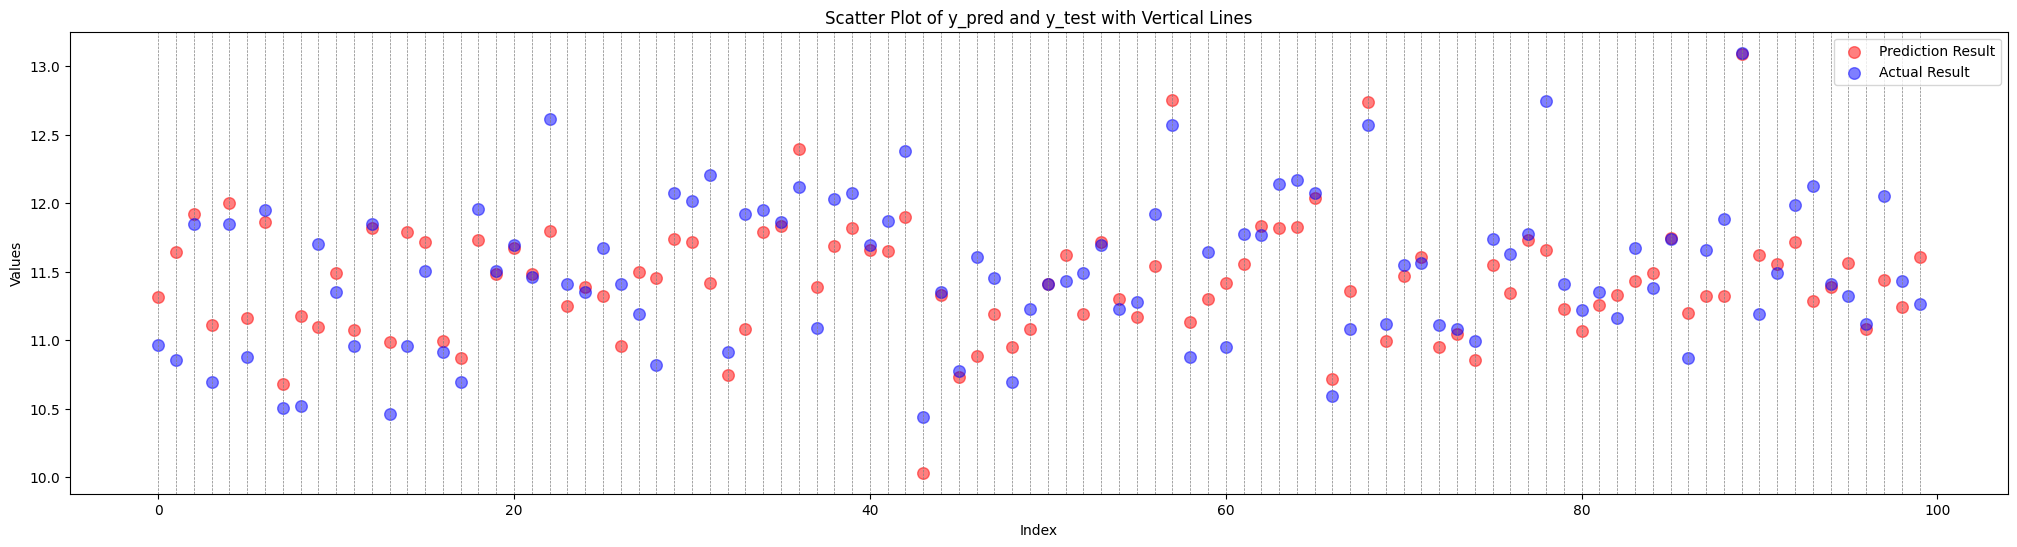

In [82]:
plt.figure(figsize=(25, 6))

plt.scatter(df_reset.index, df_reset['y_pred'], color='red', label='Prediction Result',s=70, alpha = 0.5)
plt.scatter(df_reset.index, df_reset['y_test'], color='blue', label='Actual Result',s=70, alpha = 0.5)

for x in df_reset.index:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.title('Scatter Plot of y_pred and y_test with Vertical Lines')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend()

plt.show()

### XGBOOST train_split

In [83]:
xgb_reg = xgb.XGBRegressor(random_state=2024, max_depth =  10, n_estimators = 550)
xgb_reg.fit(X_train, y_train)


y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse_test}')
print(f'R2: {r2}')
n = len(y_test)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'ADJ R²: {r2_adj}')
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse_test)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 0.005919431242547322
R2: 0.973280103515696
ADJ R²: 0.9732119405144606
RMSE: 0.07693784012140789
MAE: 0.025190318681485264


In [84]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2024)

# # 랜덤 포레스트 모델 초기화
# xgb_reg = xgb.XGBRegressor(random_state=42)

# # 최적화할 파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [300, 400, 450,500,550],
#     'max_depth': [5, 10, 15, 13],
#     "MAX_DELTA_STEP" : [0,1,3],
#     'learning_rate' : [0.1,0.15, 0.3, 0.35, 0.4]
# }

# # GridSearchCV 초기화
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# # 파라미터 최적화를 위한 모델 훈련
# grid_search.fit(X_train, y_train)

# # 최적 파라미터 출력
# print("최적 파라미터:", grid_search.best_params_)

# # 최적 파라미터로 훈련된 모델을 사용하여 테스트 데이터에 대한 성능 평가
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # 성능 평가
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# print(f"테스트 데이터의 MSE: {mse}")
# 최적 파라미터: {'MAX_DELTA_STEP': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 550}
# 테스트 데이터의 MSE: 0.006684759719830564

In [85]:
df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
df_index = df.index
df_reset = df.reset_index(drop=True)
df_reset = df_reset.head(120)

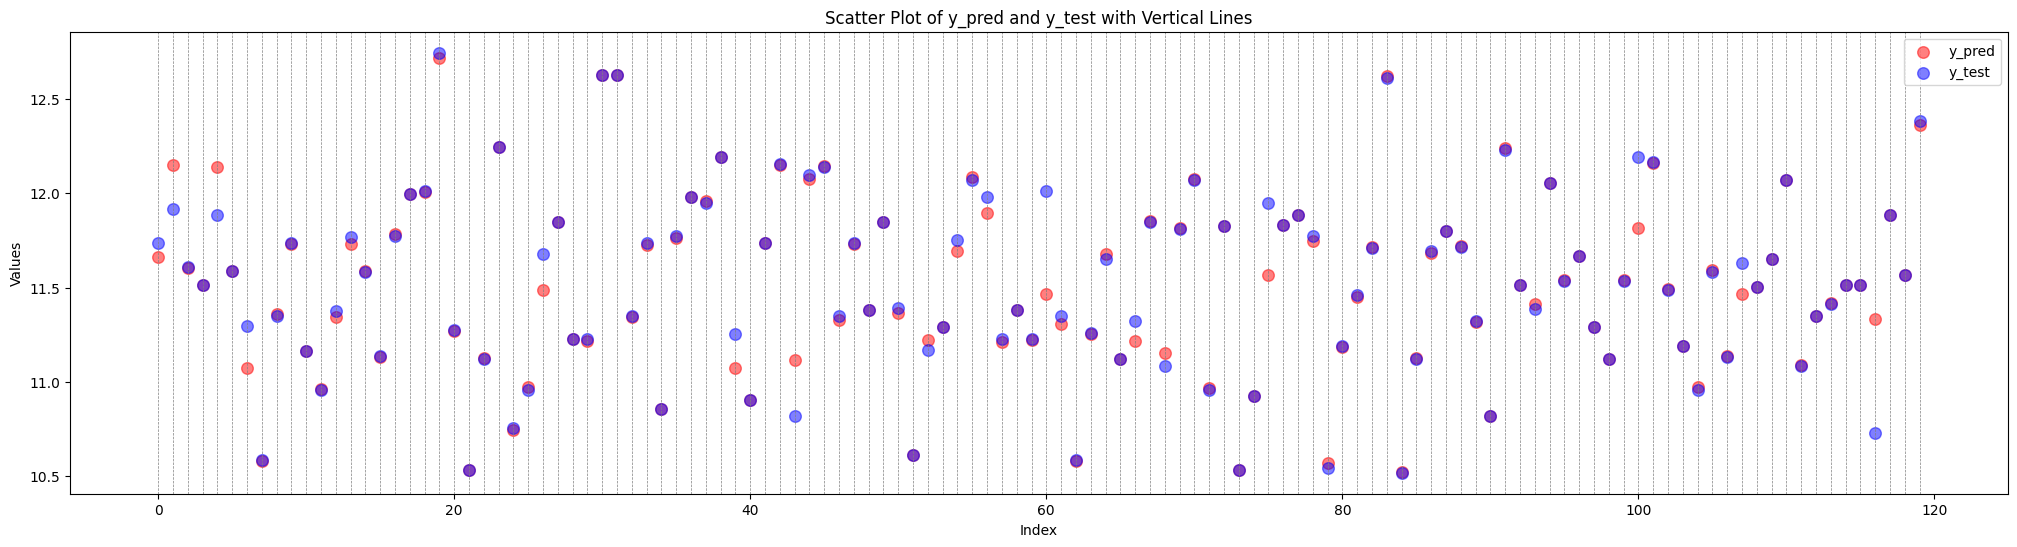

In [86]:
plt.figure(figsize=(25, 6))

plt.scatter(df_reset.index, df_reset['y_pred'], color='red', label='y_pred', s=70, alpha = 0.5)
plt.scatter(df_reset.index, df_reset['y_test'], color='blue', label='y_test', s=70, alpha = 0.5)

for x in df_reset.index:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.title('Scatter Plot of y_pred and y_test with Vertical Lines')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend()

plt.show()

                    Feature  Importance
4  experience_level_encoded    0.649819
6           country_encoded    0.071522
3           log_listed_time    0.058242
0                     views    0.055226
2              company_size    0.050495
1                   applies    0.047579
5     industry_name_encoded    0.041087
7         skill_abr_encoded    0.023834
8              type_encoded    0.002196


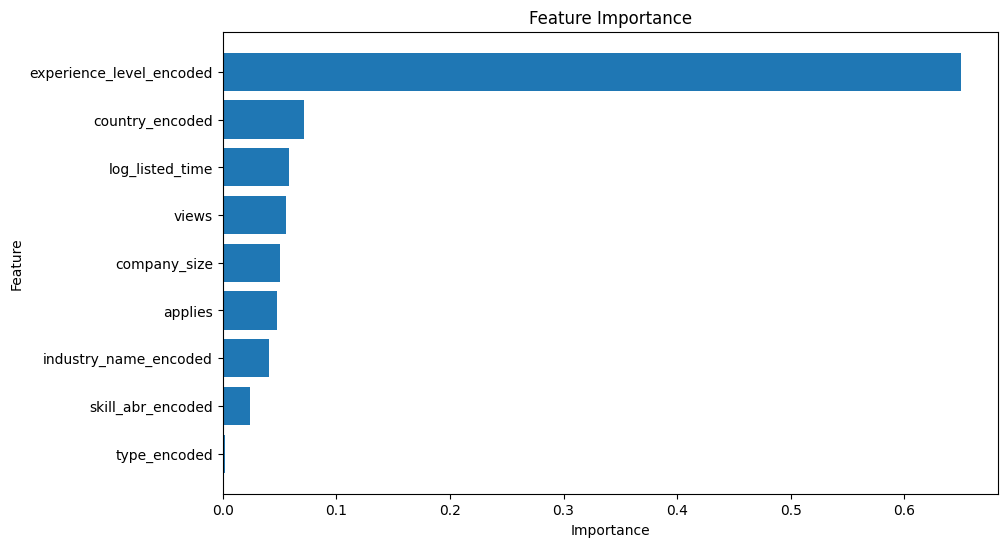

In [87]:
# 특성 중요도 추출
importance = xgb_reg.feature_importances_

features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


### XGBoost K-Fold

In [88]:
kf = KFold(n_splits=10, shuffle=True, random_state=2024)

mse_list = []
r2_list = []
r2_adj_list = []
mae_list = []
rmse_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb_reg = xgb.XGBRegressor(random_state=2024, max_depth=10, n_estimators=550)
    xgb_reg.fit(X_train, y_train)

    y_pred = xgb_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    n = len(y_test)
    p = X.shape[1]
    r2_adj = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    mse_list.append(mse)
    r2_list.append(r2)
    r2_adj_list.append(r2_adj)
    mae_list.append(mae)
    rmse_list.append(rmse)

# Calculating average metrics
avg_mse = np.mean(mse_list)
avg_r2 = np.mean(r2_list)
avg_r2_adj = np.mean(r2_adj_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)

print(f'Average MSE: {avg_mse}')
print(f'Average R2: {avg_r2}')
print(f'Average ADJ R²: {avg_r2_adj}')
print(f'Average RMSE: {avg_rmse}')
print(f'Average MAE: {avg_mae}')


Average MSE: 0.005292832439922749
Average R2: 0.9762501164507101
Average ADJ R²: 0.9761285743942031
Average RMSE: 0.07206528139874621
Average MAE: 0.021165180989057678


Gradient 부스팅

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

gbr = GradientBoostingRegressor(random_state=2024, n_estimators=300, max_depth =  10)
gbr.fit(X_train, y_train)


y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse_test}')
print(f'R2: {r2}')
n = len(y_test)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f'adj R²: {r2_adj}')
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse_test)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


MSE: 0.007220303546443439
R2: 0.9678765889341086
adj R²: 0.9677946414568996
RMSE: 0.08497236931169708
MAE: 0.02620199728147892


In [90]:
df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
df_index = df.index
df_reset = df.reset_index(drop=True)
df_reset = df_reset.head(120)

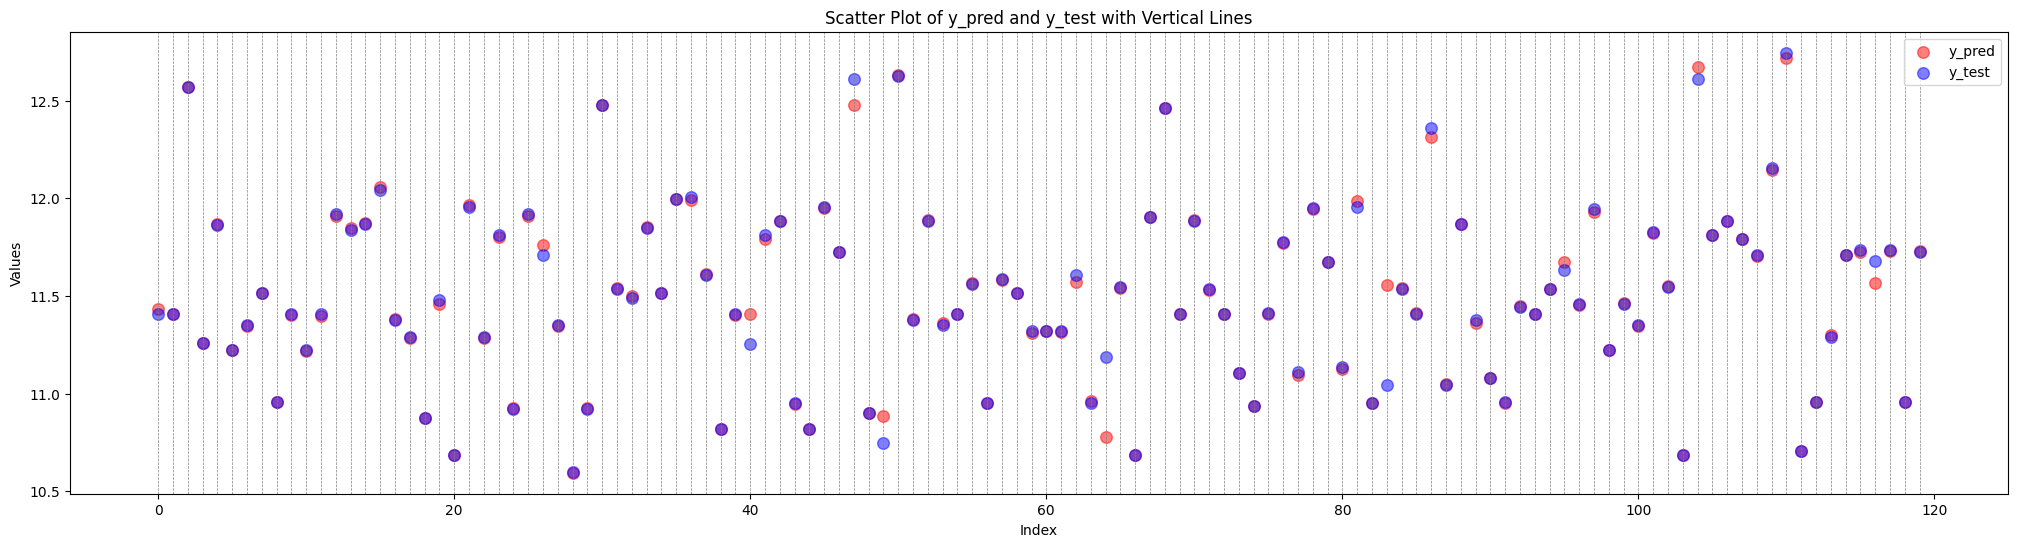

In [91]:
plt.figure(figsize=(25, 6))

plt.scatter(df_reset.index, df_reset['y_pred'], color='red', label='y_pred', s=70, alpha = 0.5)
plt.scatter(df_reset.index, df_reset['y_test'], color='blue', label='y_test', s=70, alpha = 0.5)

for x in df_reset.index:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.title('Scatter Plot of y_pred and y_test with Vertical Lines')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend()

plt.show()

                    Feature  Importance
4  experience_level_encoded    0.347082
0                     views    0.208815
5     industry_name_encoded    0.130873
7         skill_abr_encoded    0.079957
1                   applies    0.077420
3           log_listed_time    0.074734
2              company_size    0.058999
6           country_encoded    0.017238
8              type_encoded    0.004881


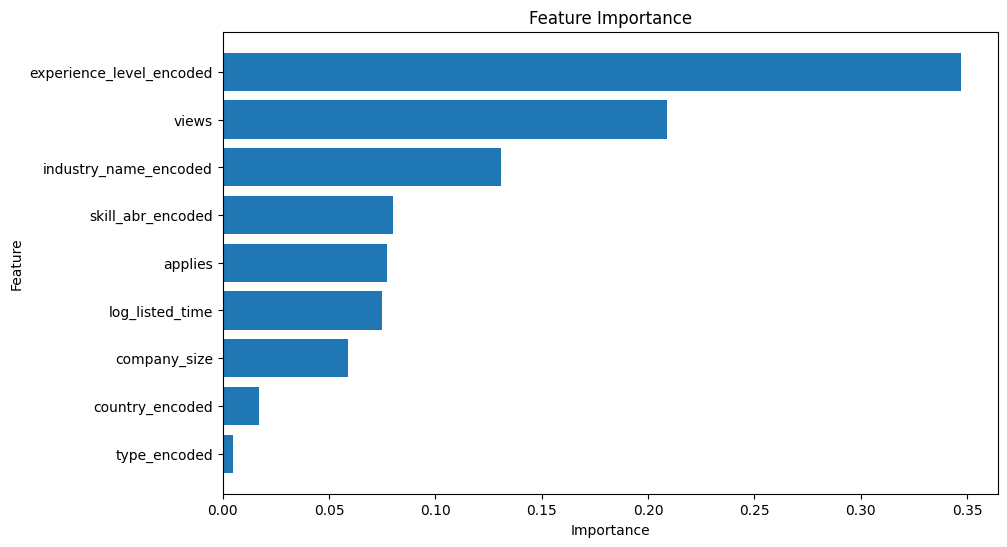

In [92]:
# 특성 중요도 추출
importance = gbr.feature_importances_

features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
